In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('mle.csv')  # Replace 'mle.csv' with the actual file path

# Inspect the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

First 5 rows of the dataset:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

   

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('mle.csv')

# Check for non-numeric columns
print("Data types:")
print(data.dtypes)

# Option 1: Drop non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputation to numeric columns
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(data_imputed.isnull().sum())

Data types:
hsi_id            object
0                float64
1                float64
2                float64
3                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 450, dtype: object

Missing values after imputation:
0                0
1                0
2                0
3                0
4                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 449, dtype: int64


In [12]:
# Normalize the entire dataset
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the entire dataset
scaled_data = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

print("entire dataset normalized:")
print(scaled_data.head())

entire dataset normalized:
          0         1         2         3         4         5         6  \
0 -0.602959 -0.965751 -0.543093 -1.157165 -0.742877 -1.052805 -1.138474   
1 -0.611562 -0.831331 -0.683547 -0.654183 -0.480564 -0.510221 -0.678841   
2 -1.210868 -1.529537 -1.328061 -1.135296 -1.277202 -1.403752 -1.618288   
3  0.575693  0.714559  0.637270  0.721659  0.940964  1.060639  1.176304   
4  0.900614  1.022832  0.772988  1.336847  0.992857  0.866564  1.177082   

          7         8         9  ...       439       440       441       442  \
0 -1.291257 -1.128080 -0.647413  ... -0.579796 -0.435043 -0.472136 -0.641236   
1 -0.826155 -0.462121 -0.691024  ... -1.071488 -0.811826 -0.715506 -0.814737   
2 -1.577331 -1.492895 -1.516409  ... -1.089395 -1.333533 -1.437541 -1.186149   
3  0.638522  0.488863  0.540156  ...  0.028574 -0.186753 -0.068313 -0.181179   
4  0.936845  0.737234  0.940551  ...  0.542282  0.600180  0.390096  0.442627   

        443       444       445       446

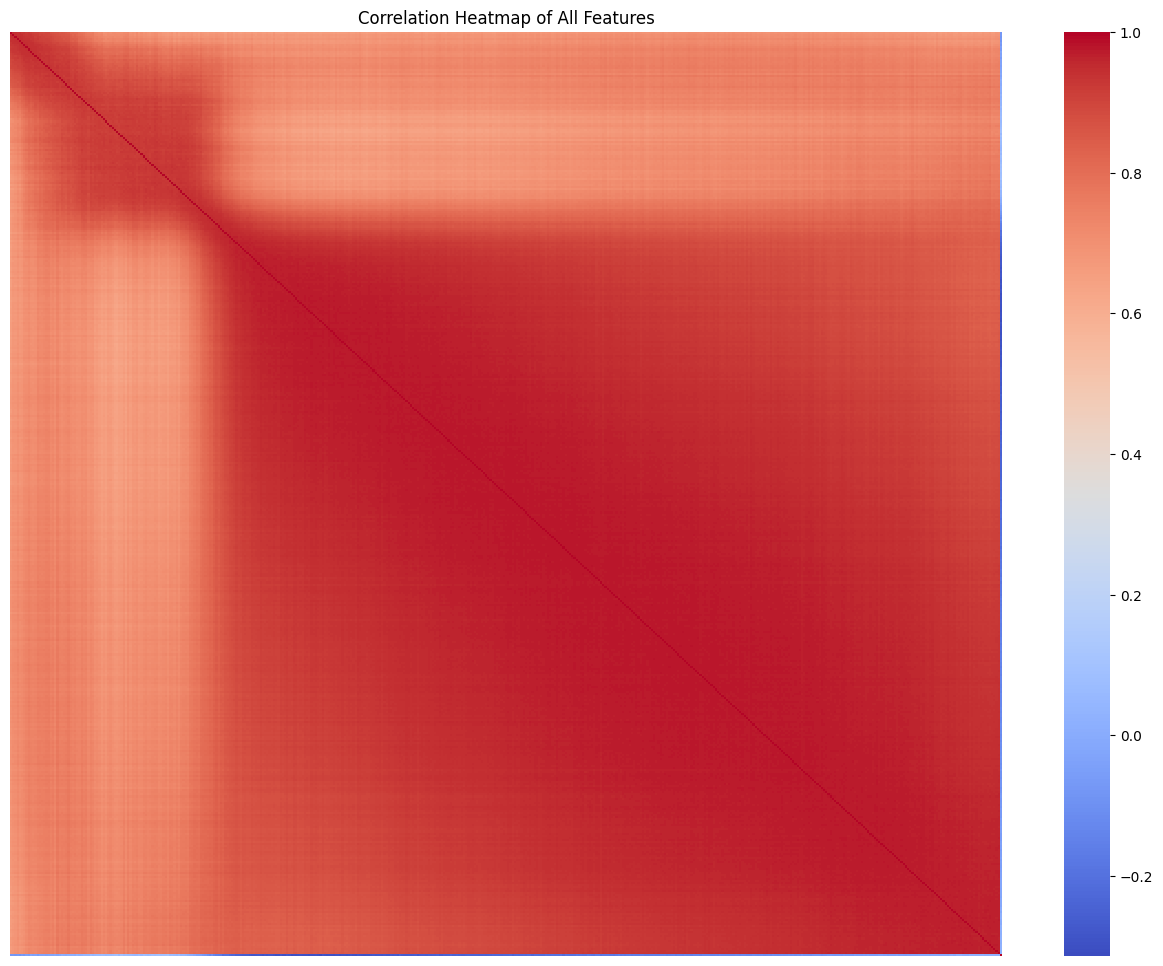

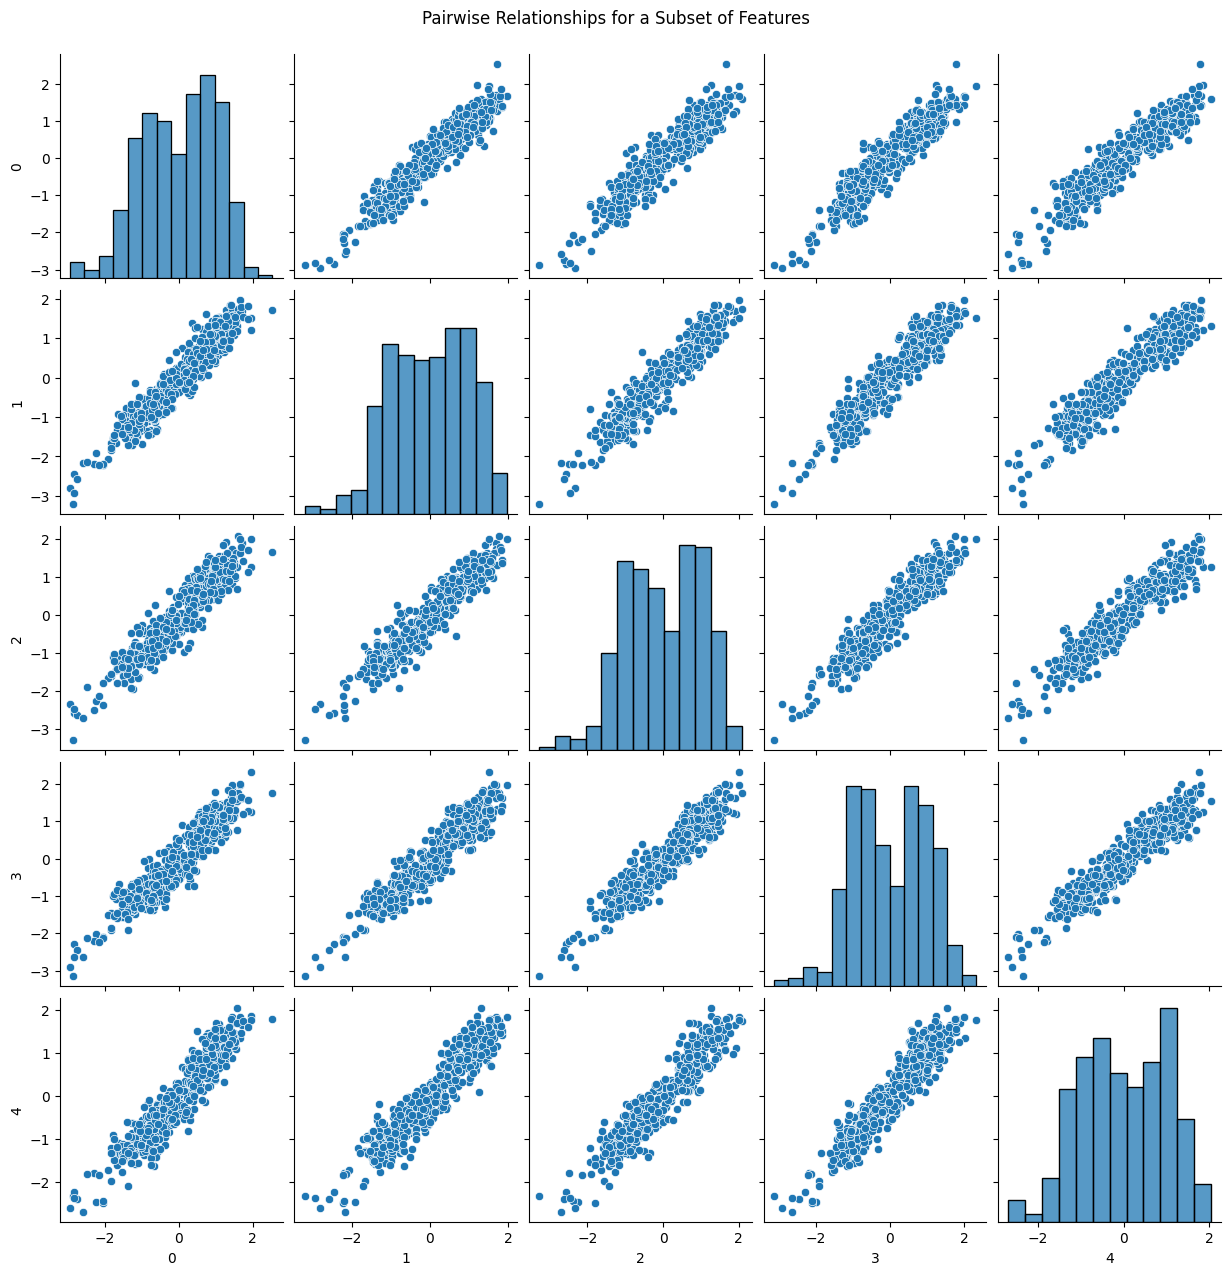

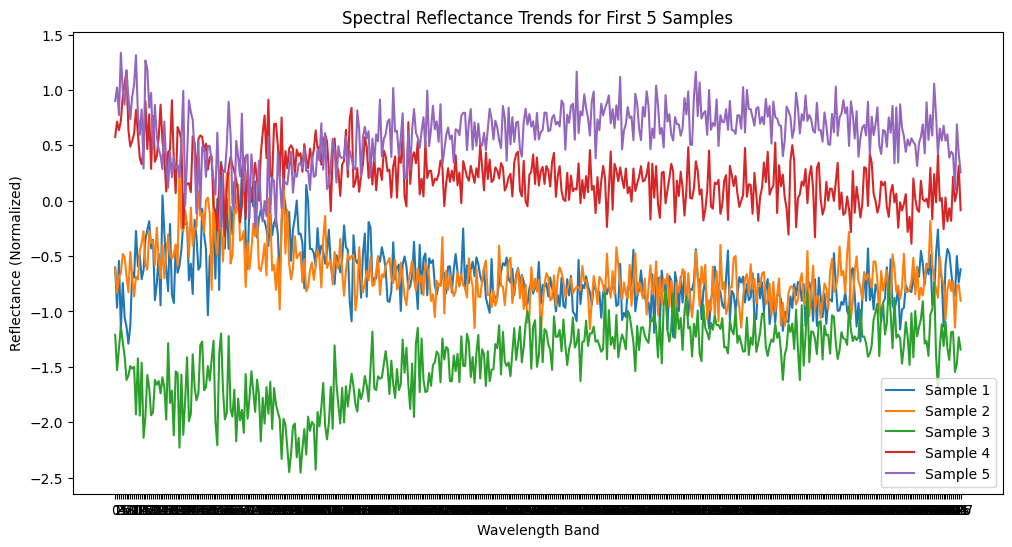

In [15]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for correlations
plt.figure(figsize=(16, 12))
sns.heatmap(scaled_data.corr(), annot=False, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Pairplot for a subset of columns (e.g., first 5 features)
subset_columns = scaled_data.columns[:5]  # Adjust the number of columns as needed
sns.pairplot(scaled_data[subset_columns])
plt.suptitle('Pairwise Relationships for a Subset of Features', y=1.02)
plt.show()

# Line plot for spectral trends (first 5 samples)
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot the first 5 samples
    plt.plot(scaled_data.iloc[i, :-1], label=f'Sample {i+1}')
plt.title('Spectral Reflectance Trends for First 5 Samples')
plt.xlabel('Wavelength Band')
plt.ylabel('Reflectance (Normalized)')
plt.legend()
plt.show()

In [18]:
# Import train-test split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = scaled_data
y = scaled_data

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing sets created:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training and testing sets created:
Training set: (400, 449), Testing set: (100, 449)


In [19]:
# Import neural network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer (regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

print("\nModel training complete.")

2025-03-16 18:11:04.383430: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 18:11:04.490051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 18:11:04.854875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742128865.300917   14181 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742128865.401463   14181 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742128866.124057   14181 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.0741 - val_loss: 0.2911
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2085 - val_loss: 0.1770
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1565 - val_loss: 0.1689
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1613 - val_loss: 0.1676
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1613 - val_loss: 0.1648
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1542 - val_loss: 0.1630
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1521 - val_loss: 0.1649
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1398 - val_loss: 0.1693
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1321 - val_loss: 0.1626
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1485 - val_loss: 0.1631
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1335 - val_loss: 0.1621
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('mle.csv')  # Replace 'mle.csv' with the actual file path
# Drop the 'hsi_id' column if it exists
if 'hsi_id' in data.columns:
    data = data.drop(columns=['hsi_id'])

# Separate features (X) and target (y)
X = data.drop(columns=['vomitoxin_ppb'])  # Replace 'vomitoxin_ppb' with the correct target column name
y = data['vomitoxin_ppb']

# Step 2: Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print("Shapes of training and testing sets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Step 3: Define the Model
model = MLPRegressor(max_iter=2000, random_state=42, early_stopping=True)

# Step 4: Define Hyperparameter Distribution for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],  # Different architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128],  # Batch size for training
}

# Step 5: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    random_state=42,
    verbose=1
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 6: Train the Final Model with Best Hyperparameters
final_model = random_search.best_estimator_
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Final Model MSE: {mse}")

Shapes of training and testing sets:
X_train: (400, 448), y_train: (400,)
X_test: (100, 448), y_test: (100,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'learning_rate_init': 0.01, 'hidden_layer_sizes': (64,), 'batch_size': 32, 'alpha': 0.01, 'activation': 'relu'}
Final Model MSE: 184301501.4790554


In [31]:
# Step 3.1: Calculate Regression Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure the model is fitted before making predictions
if not hasattr(final_model, 'coefs_'):  # Check if the model is fitted
    final_model.fit(X_train, y_train)  # Fit the model if not already fitted

# Make predictions
y_pred = final_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Model Evaluation Metrics:
MAE: 4090.368893080796
RMSE: 13575.76890931248
R²: 0.34068096798587366


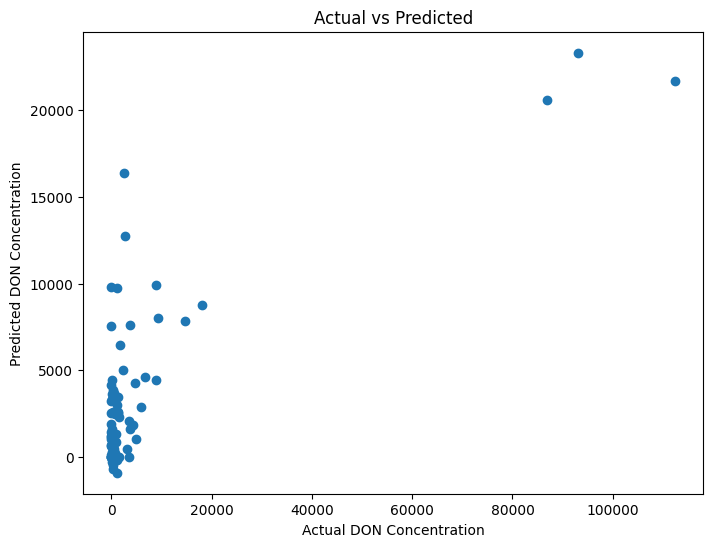

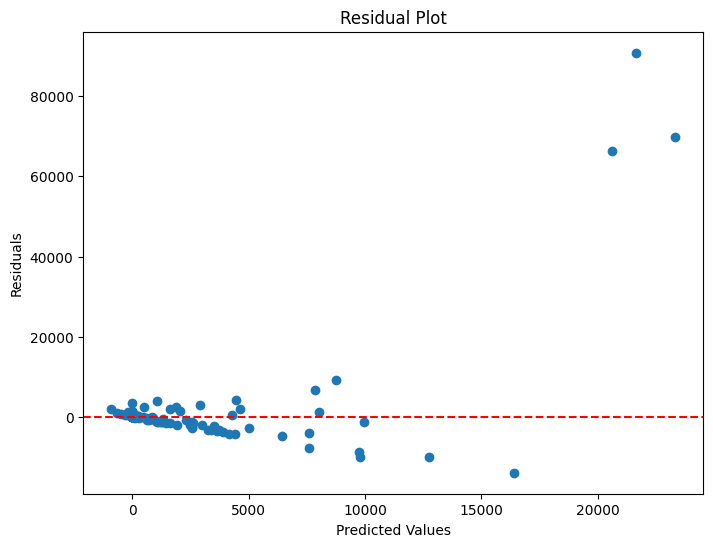

In [32]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual DON Concentration')
plt.ylabel('Predicted DON Concentration')
plt.title('Actual vs Predicted')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [49]:
# test_data_preprocessing.py (Fixed Version)

import unittest
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define the preprocessing function directly in the notebook
def preprocess_data(data):
    # Handle missing values using mean imputation
    imputer = SimpleImputer(strategy='mean')
    data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    # Normalize the features
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

    return scaled_data

# Write unit tests for the preprocessing function
class TestPreprocessing(unittest.TestCase):
    def test_missing_values(self):
        """
        Test if missing values are handled correctly.
        """
        # Create a sample dataset with missing values
        data = pd.DataFrame({
            'A': [1, 2, np.nan],
            'B': [4, np.nan, 6]
        })

        # Preprocess the data
        processed_data = preprocess_data(data)

        # Check if there are no missing values
        self.assertEqual(processed_data.isnull().sum().sum(), 0)

    def test_normalization(self):
        """
        Test if the data is normalized correctly.
        """
        # Create a sample dataset
        data = pd.DataFrame({
            'A': [1, 2, 3],
            'B': [4, 5, 6]
        })

        # Preprocess the data
        processed_data = preprocess_data(data)

        # Check if the mean of each column is approximately 0
        self.assertTrue(np.allclose(processed_data.mean(), 0, atol=1e-7))

        # Check if the standard deviation of each column is approximately 1
        for col in processed_data.columns:
            self.assertTrue(np.allclose(processed_data[col].std(), 1, atol=1e-7))

# Run the unit tests in Jupyter Notebook
def run_tests():
    """
    Run the unit tests and display the results.
    """
    # Create a test suite
    suite = unittest.TestLoader().loadTestsFromTestCase(TestPreprocessing)
    
    # Run the tests
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)
    
    # Print the results
    print("Tests run:", result.testsRun)
    print("Failures:", len(result.failures))
    print("Errors:", len(result.errors))

# Execute the tests
run_tests()

test_missing_values (__main__.TestPreprocessing.test_missing_values)
Test if missing values are handled correctly. ... ok
test_normalization (__main__.TestPreprocessing.test_normalization)
Test if the data is normalized correctly. ... FAIL

FAIL: test_normalization (__main__.TestPreprocessing.test_normalization)
Test if the data is normalized correctly.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_14181/2237956735.py", line 66, in test_normalization
    self.assertTrue(np.allclose(processed_data[col].std(), 1, atol=1e-7))
AssertionError: False is not true

----------------------------------------------------------------------
Ran 2 tests in 0.055s

FAILED (failures=1)


Tests run: 2
Failures: 1
Errors: 0
